## Create radarcharts from ScandEval

In [77]:
import json
import pandas as pd

file = "../scandeval_benchmark_results.jsonl"
with open(file, 'r') as f:
    json_list = list(f)

data = [json.loads(item) for item in json_list]
df = pd.DataFrame(data)

def format_mean_se(mean, se):
    return f"{mean:.2f}"

results = []
for _, row in df.iterrows():
    task = row['task']
    model = row['model']
    dataset_languages = ', '.join(row['dataset_languages'])
    results_dict = row['results']['total']

    formatted_metrics = {}
    for metric, value in results_dict.items():
        if "_se" in metric:
            continue
        se_metric = metric + "_se"
        formatted_metrics[metric] = format_mean_se(value, results_dict[se_metric])

    # Model Information
    num_params = f"{int(row['num_model_parameters']):,}"
    max_seq_length = row['max_sequence_length']
    vocabulary_size = row['vocabulary_size']
    generative = row['generative']
    few_shot = row['few_shot']
    validation_split = row['validation_split']
    scandeval_version = row['scandeval_version']
    dataset = row['dataset']

    results.append({
        'Dataset': dataset,
        'Task': task,
        'Language(s)': dataset_languages,
        'Model': model,
        'Results': formatted_metrics,
        'Model Information': {
            'Number of Parameters': num_params,
            'Max Sequence Length': max_seq_length,
            'Vocabulary Size': vocabulary_size,
            'Generative': generative,
            'Few-shot': few_shot,
            'Validation Split': validation_split,
            'Scandeval Version': scandeval_version
        }
    })

x = 11
print(results[x*8]['Model'])

merged-models/gpt-sw3-6.7b-hopkok-v3-nosystem-DPO


In [78]:
hopkokv3 = [results[x*8 + i]['Results'].values() for i in range(8)]
hopkokv3 = [list(map(float, x)) for x in hopkokv3]
hopkokv3 = [x[0] for x in hopkokv3][:-1]
print(hopkokv3)

[67.31, 31.97, 7.46, 48.9, 61.62, 8.95, 33.32]


In [45]:
hopkokv1 = [results[x*8 + i]['Results'].values() for i in range(8)]
hopkokv1 = [list(map(float, x)) for x in hopkokv1]
hopkokv1 = [x[0] for x in hopkokv1][:-1]
print(hopkokv1)

[75.55, 27.77, 6.63, 51.28, 49.64, 6.23, 30.62]


In [80]:
gptsw3_6_7b = [77.47, 28.73, 8.78, 50.57, 62.41, 5.23, 5.39]
gptsw3_6_7b_instruct = [56.60, 14.58, 10.92, 50.18, 64.89, 6.16, 10.90]

In [81]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

categories = ['Text Classification (MCC)', 'Information Extraction (Micro-Avg F1)', 'Grammar (MCC)', 'Question Answering (Exact Match)', 'Summarization (BERTScore)', 'Knowledge (MCC)', 'Reasoning (MCC)']
categories = categories + [categories[0]]
hopkokv3 = hopkokv3 + [hopkokv3[0]]
gptsw3_6_7b_instruct = gptsw3_6_7b_instruct + [gptsw3_6_7b_instruct[0]]
gptsw3_6_7b = gptsw3_6_7b + [gptsw3_6_7b[0]]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
        r=hopkokv3,
        theta=categories,
        name='GPT-SW3-6.7B-V2-HOPKOK-V3-DPO'
    ))

fig.add_trace(go.Scatterpolar(
        r=gptsw3_6_7b,
        theta=categories,
        # fill='toself',
        name='GPT-SW3-6.7B-V2'
    ))

# fig.add_trace(go.Scatterpolar(
#         r=gptsw3_6_7b_instruct,
#         theta=categories,
#         name='GPT-SW3-6.7B-V2-INSTRUCT'
#     ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )),
    showlegend=True
)

fig.show()


## Charts for BiaSWE

In [ ]:
gptsw3_6_7b_instruct = [0.3392284014795779, 0.4148054465198028]
gptsw3_6_7b_hopkokv3 = [0.6330294388417612, 0.5878238579124051]
gptsw3_6_7_hopkokv3_dpo = [0.6831262134969214, 0.6388888888888888]

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = {'Values': [gptsw3_6_7b_instruct[0], gptsw3_6_7b_hopkokv3[0], gptsw3_6_7_hopkokv3_dpo[0]],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'GPT-SW3-6.7B-V2-HOPKOK-V3', 'GPT-SW3-6.7B-V2-HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Hate Speech (F1-Score)')
plt.show()

data = {'Values': [gptsw3_6_7b_instruct[1], gptsw3_6_7b_hopkokv3[1], gptsw3_6_7_hopkokv3_dpo[1]],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'GPT-SW3-6.7B-V2-HOPKOK-V3', 'GPT-SW3-6.7B-V2-HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Misogyny (F1-Score)')
plt.show()

data = {'Values': [np.average(gptsw3_6_7b_instruct), np.average(gptsw3_6_7b_hopkokv3), np.average(gptsw3_6_7_hopkokv3_dpo)],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'GPT-SW3-6.7B-V2-HOPKOK-V3', 'GPT-SW3-6.7B-V2-HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Macro-Averaged (F1-Score)')
plt.show()

/tmp/ipykernel_435381/1199982216.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




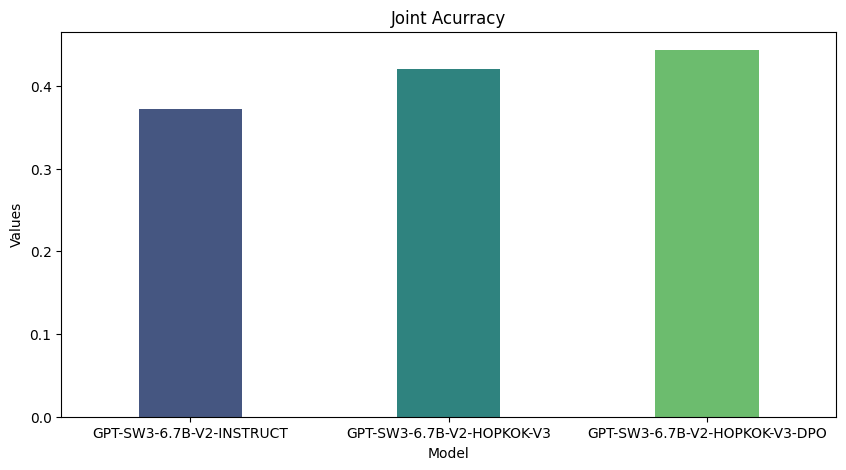

In [76]:
gptsw3_6_7b_instruct = 0.372
gptsw3_6_7b_hopkokv3 = 0.42000000000000004
gptsw3_6_7_hopkokv3_dpo = 0.44333333333333336

data = {'Values': [gptsw3_6_7b_instruct, gptsw3_6_7b_hopkokv3, gptsw3_6_7_hopkokv3_dpo],
        'Model': ['GPT-SW3-6.7B-V2-INSTRUCT', 'GPT-SW3-6.7B-V2-HOPKOK-V3', 'GPT-SW3-6.7B-V2-HOPKOK-V3-DPO']} 

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Values', data=data, palette='viridis', width=0.4)
plt.title('Joint Acurracy')
plt.show()